In [1]:

import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*13,3), np.float32)
objp[:,:2] = np.mgrid[0:13, 0:7].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
path = 'C:/Users/ray/Desktop/ccdataset-main/textures/Distorted/'
images = glob.glob(path + '*Cam000*.png')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    #if not (idx % 4):
        print("Processing " + str(idx + 1) + "/" + str(len(images)))
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (13,7), None)

        # If found, add object points, image points
        if ret == True:
            term = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1)
            cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), term)
            objpoints.append(objp)
            imgpoints.append(corners)
            # Draw and display the corners
            cv2.drawChessboardCorners(img, (13,7), corners, ret)
            #write_name = 'corners_found'+str(idx)+'.jpg'
            #cv2.imwrite(write_name, img)
            cv2.imshow('img', img)
            cv2.waitKey(500)

cv2.destroyAllWindows()

Processing 1/126
Processing 2/126
Processing 3/126
Processing 4/126
Processing 5/126
Processing 6/126
Processing 7/126
Processing 8/126
Processing 9/126
Processing 10/126
Processing 11/126
Processing 12/126
Processing 13/126
Processing 14/126
Processing 15/126
Processing 16/126
Processing 17/126
Processing 18/126
Processing 19/126
Processing 20/126
Processing 21/126
Processing 22/126
Processing 23/126
Processing 24/126
Processing 25/126
Processing 26/126
Processing 27/126
Processing 28/126
Processing 29/126
Processing 30/126
Processing 31/126
Processing 32/126
Processing 33/126
Processing 34/126
Processing 35/126
Processing 36/126
Processing 37/126
Processing 38/126
Processing 39/126
Processing 40/126
Processing 41/126
Processing 42/126
Processing 43/126
Processing 44/126
Processing 45/126
Processing 46/126
Processing 47/126
Processing 48/126
Processing 49/126
Processing 50/126
Processing 51/126
Processing 52/126
Processing 53/126
Processing 54/126
Processing 55/126
Processing 56/126
P

In [2]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread(path + '056LF0_Cam000texture.png')
img_size = (img.shape[1], img.shape[0])
print(img_size)
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None, flags=cv2.CALIB_FIX_PRINCIPAL_POINT | cv2.CALIB_FIX_ASPECT_RATIO | cv2.CALIB_ZERO_TANGENT_DIST | cv2.CALIB_FIX_K4 | cv2.CALIB_FIX_K5 | cv2.CALIB_FIX_K6)
print("RMS:\n")
print(ret)
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)

(1920, 1920)
RMS:

0.2960124559021871
Camera matrix : 

[[1.28489825e+03 0.00000000e+00 9.59500000e+02]
 [0.00000000e+00 1.28489825e+03 9.59500000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[-0.0879344  -0.22453348  0.          0.          0.13516987]]


Text(0.5, 1.0, 'Undistorted Image')

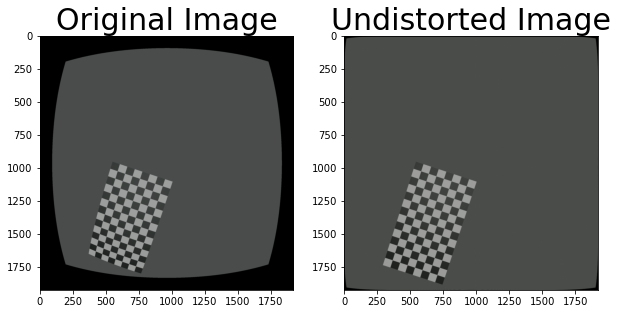

In [3]:
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite(path + '056LF0_Cam000texture_undistorted.png',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)


In [4]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints)) )

total error: 0.024165842347362618
